# Goal:

Compare the signal of each feature in regions with perturbations vs significant regions, and between significant regions that do/do not overlap a feature.


### Load packages

In [1]:
suppressPackageStartupMessages(library(tidyverse))

In [2]:
`%notin%` <- Negate(`%in%`)

### Load and process perturbation data

#### Bin coordinates with perturbations

In [3]:
allregions <- read.delim("k562meta/elementReference/combined/binnedgenome.int.k562.elementReference.20230415.merge.bed",
                         header=FALSE, col.names=c("bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>% select(bin) %>% distinct()

head(allregions,n=1)
dim(allregions)

,bin
,<chr>
1,chr3:127573700-127574600


[1] 2733    1

#### Bin coordinates with CREs

In [4]:
sigregions <- read.delim("k562meta/elementQuant/combined/binnedgenome.int.k562.elementQuant.20230415.merge.bed",
                         header=FALSE, col.names=c("bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>% select(bin) %>% distinct()

head(sigregions,n=1)
dim(sigregions)

,bin
,<chr>
1,chr3:127672600-127673300


[1] 210   1

### Load intersection with `bedgraph` files for features

##### All regions

In [5]:
allregion_h3k27ac <- read.delim("k562meta/outs/comparesignal/binnedgenome.int.k562.elementReference.int.k562.h3k27ac.foldchange.txt",
                             header = FALSE, col.names = c("feature.chr","feature.start","feature.end","signal","bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end),
       feature_coords = paste0(feature.chr,":",feature.start,"-",feature.end),
       feature = "H3K27ac") %>% 
select(feature, bin, feature_coords, signal) %>% distinct()

head(allregion_h3k27ac,n=1)
dim(allregion_h3k27ac)

,feature,bin,feature_coords,signal
,<chr>,<chr>,<chr>,<dbl>
1,H3K27ac,chr11:4091700-4092700,chr11:4091696-4091752,4.11177


[1] 513297      4

In [6]:
allregion_dnase <- read.delim("k562meta/outs/comparesignal/binnedgenome.int.k562.elementReference.int.k562.dnase.foldchange.txt",
                             header = FALSE, col.names = c("feature.chr","feature.start","feature.end","signal","bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end),
       feature_coords = paste0(feature.chr,":",feature.start,"-",feature.end),
       feature = "DNase") %>% 
select(feature, bin, feature_coords, signal) %>% distinct()

head(allregion_dnase,n=1)
dim(allregion_dnase)

,feature,bin,feature_coords,signal
,<chr>,<chr>,<chr>,<dbl>
1,DNase,chr11:4091700-4092700,chr11:4091700-4091740,0.0883702


[1] 327467      4

In [7]:
allregion_atac <- read.delim("k562meta/outs/comparesignal/binnedgenome.int.k562.elementReference.int.k562.atac.foldchange.txt",
                             header = FALSE, col.names = c("feature.chr","feature.start","feature.end","signal","bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end),
       feature_coords = paste0(feature.chr,":",feature.start,"-",feature.end),
       feature = "ATAC") %>% 
select(feature, bin, feature_coords, signal) %>% distinct()

head(allregion_atac,n=1)
dim(allregion_atac)

,feature,bin,feature_coords,signal
,<chr>,<chr>,<chr>,<dbl>
1,ATAC,chr11:4091700-4092700,chr11:4091699-4091701,0.2404


[1] 1091053       4

In [8]:
allregion_h3k4me1 <- read.delim("k562meta/outs/comparesignal/binnedgenome.int.k562.elementReference.int.k562.h3k4me1.foldchange.txt",
                             header = FALSE, col.names = c("feature.chr","feature.start","feature.end","signal","bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end),
       feature_coords = paste0(feature.chr,":",feature.start,"-",feature.end),
       feature = "H3K4me1") %>% 
select(feature, bin, feature_coords, signal) %>% distinct()

head(allregion_atac,n=1)
dim(allregion_atac)

,feature,bin,feature_coords,signal
,<chr>,<chr>,<chr>,<dbl>
1,ATAC,chr11:4091700-4092700,chr11:4091699-4091701,0.2404


[1] 1091053       4

In [9]:
allregion_h3k4me3 <- read.delim("k562meta/outs/comparesignal/binnedgenome.int.k562.elementReference.int.k562.h3k4me3.foldchange.txt",
                             header = FALSE, col.names = c("feature.chr","feature.start","feature.end","signal","bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end),
       feature_coords = paste0(feature.chr,":",feature.start,"-",feature.end),
       feature = "H3K4me3") %>% 
select(feature, bin, feature_coords, signal) %>% distinct()

head(allregion_atac,n=1)
dim(allregion_atac)

,feature,bin,feature_coords,signal
,<chr>,<chr>,<chr>,<dbl>
1,ATAC,chr11:4091700-4092700,chr11:4091699-4091701,0.2404


[1] 1091053       4

In [10]:
allregion_h3k9me3 <- read.delim("k562meta/outs/comparesignal/binnedgenome.int.k562.elementReference.int.k562.h3k9me3.foldchange.txt",
                             header = FALSE, col.names = c("feature.chr","feature.start","feature.end","signal","bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end),
       feature_coords = paste0(feature.chr,":",feature.start,"-",feature.end),
       feature = "H3K9me3") %>% 
select(feature, bin, feature_coords, signal) %>% distinct()

head(allregion_atac,n=1)
dim(allregion_atac)

,feature,bin,feature_coords,signal
,<chr>,<chr>,<chr>,<dbl>
1,ATAC,chr11:4091700-4092700,chr11:4091699-4091701,0.2404


[1] 1091053       4

In [11]:
allregion_h3k27me3 <- read.delim("k562meta/outs/comparesignal/binnedgenome.int.k562.elementReference.int.k562.h3k27me3.foldchange.txt",
                             header = FALSE, col.names = c("feature.chr","feature.start","feature.end","signal","bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end),
       feature_coords = paste0(feature.chr,":",feature.start,"-",feature.end),
       feature = "H3K27me3") %>% 
select(feature, bin, feature_coords, signal) %>% distinct()

head(allregion_atac,n=1)
dim(allregion_atac)

,feature,bin,feature_coords,signal
,<chr>,<chr>,<chr>,<dbl>
1,ATAC,chr11:4091700-4092700,chr11:4091699-4091701,0.2404


[1] 1091053       4

In [12]:
allregion_ep300 <- read.delim("k562meta/outs/comparesignal/binnedgenome.int.k562.elementReference.int.k562.ep300.foldchange.txt",
                             header = FALSE, col.names = c("feature.chr","feature.start","feature.end","signal","bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end),
       feature_coords = paste0(feature.chr,":",feature.start,"-",feature.end),
       feature = "EP300") %>% 
select(feature, bin, feature_coords, signal) %>% distinct()

head(allregion_atac,n=1)
dim(allregion_atac)

,feature,bin,feature_coords,signal
,<chr>,<chr>,<chr>,<dbl>
1,ATAC,chr11:4091700-4092700,chr11:4091699-4091701,0.2404


[1] 1091053       4

In [13]:
allregion_ctcf <- read.delim("k562meta/outs/comparesignal/binnedgenome.int.k562.elementReference.int.k562.ctcf.foldchange.txt",
                             header = FALSE, col.names = c("feature.chr","feature.start","feature.end","signal","bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end),
       feature_coords = paste0(feature.chr,":",feature.start,"-",feature.end),
       feature = "CTCF") %>% 
select(feature, bin, feature_coords, signal) %>% distinct()

head(allregion_atac,n=1)
dim(allregion_atac)

,feature,bin,feature_coords,signal
,<chr>,<chr>,<chr>,<dbl>
1,ATAC,chr11:4091700-4092700,chr11:4091699-4091701,0.2404


[1] 1091053       4

In [14]:
allregion_polr2a <- read.delim("k562meta/outs/comparesignal/binnedgenome.int.k562.elementReference.int.k562.polr2a.foldchange.txt",
                             header = FALSE, col.names = c("feature.chr","feature.start","feature.end","signal","bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end),
       feature_coords = paste0(feature.chr,":",feature.start,"-",feature.end),
       feature = "POLR2A") %>% 
select(feature, bin, feature_coords, signal) %>% distinct()

head(allregion_atac,n=1)
dim(allregion_atac)

,feature,bin,feature_coords,signal
,<chr>,<chr>,<chr>,<dbl>
1,ATAC,chr11:4091700-4092700,chr11:4091699-4091701,0.2404


[1] 1091053       4

##### Significant regions

In [15]:
sigregion_h3k27ac <- read.delim("k562meta/outs/comparesignal/binnedgenome.int.k562.elementQuant.int.k562.h3k27ac.foldchange.txt",
                             header = FALSE, col.names = c("feature.chr","feature.start","feature.end","signal","bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>%
select(bin) %>% distinct() %>% pull()

length(sigregion_h3k27ac)

[1] 210

In [16]:
sigregion_dnase <- read.delim("k562meta/outs/comparesignal/binnedgenome.int.k562.elementQuant.int.k562.dnase.foldchange.txt",
                             header = FALSE, col.names = c("feature.chr","feature.start","feature.end","signal","bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>%
select(bin) %>% distinct() %>% pull()

length(sigregion_dnase)

[1] 210

In [17]:
sigregion_atac <- read.delim("k562meta/outs/comparesignal/binnedgenome.int.k562.elementQuant.int.k562.atac.foldchange.txt",
                             header = FALSE, col.names = c("feature.chr","feature.start","feature.end","signal","bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>%
select(bin) %>% distinct() %>% pull()

length(sigregion_atac)

[1] 210

In [18]:
sigregion_h3k4me1 <- read.delim("k562meta/outs/comparesignal/binnedgenome.int.k562.elementQuant.int.k562.h3k4me1.foldchange.txt",
                             header = FALSE, col.names = c("feature.chr","feature.start","feature.end","signal","bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>%
select(bin) %>% distinct() %>% pull()

length(sigregion_atac)

[1] 210

In [19]:
sigregion_h3k4me3 <- read.delim("k562meta/outs/comparesignal/binnedgenome.int.k562.elementQuant.int.k562.h3k4me3.foldchange.txt",
                             header = FALSE, col.names = c("feature.chr","feature.start","feature.end","signal","bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>%
select(bin) %>% distinct() %>% pull()

length(sigregion_atac)

[1] 210

In [20]:
sigregion_h3k9me3 <- read.delim("k562meta/outs/comparesignal/binnedgenome.int.k562.elementQuant.int.k562.h3k9me3.foldchange.txt",
                             header = FALSE, col.names = c("feature.chr","feature.start","feature.end","signal","bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>%
select(bin) %>% distinct() %>% pull()

length(sigregion_atac)

[1] 210

In [21]:
sigregion_h3k27me3 <- read.delim("k562meta/outs/comparesignal/binnedgenome.int.k562.elementQuant.int.k562.h3k27me3.foldchange.txt",
                             header = FALSE, col.names = c("feature.chr","feature.start","feature.end","signal","bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>%
select(bin) %>% distinct() %>% pull()

length(sigregion_atac)

[1] 210

In [22]:
sigregion_ep300 <- read.delim("k562meta/outs/comparesignal/binnedgenome.int.k562.elementQuant.int.k562.ep300.foldchange.txt",
                             header = FALSE, col.names = c("feature.chr","feature.start","feature.end","signal","bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>%
select(bin) %>% distinct() %>% pull()

length(sigregion_atac)

[1] 210

In [23]:
sigregion_ctcf <- read.delim("k562meta/outs/comparesignal/binnedgenome.int.k562.elementQuant.int.k562.ctcf.foldchange.txt",
                             header = FALSE, col.names = c("feature.chr","feature.start","feature.end","signal","bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>%
select(bin) %>% distinct() %>% pull()

length(sigregion_atac)

[1] 210

In [24]:
sigregion_polr2a <- read.delim("k562meta/outs/comparesignal/binnedgenome.int.k562.elementQuant.int.k562.polr2a.foldchange.txt",
                             header = FALSE, col.names = c("feature.chr","feature.start","feature.end","signal","bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>%
select(bin) %>% distinct() %>% pull()

length(sigregion_atac)

[1] 210

# Run all above

### Compare signal between significant and non-significant regions, do NOT require overlap with a feature. Now add normalization for region size.

Q: Which features "explain"/"predict" a functional element?

#### Generate working df

In [ ]:
# plotdf <-
# rbind(
#     allregion_h3k4me1 %>%
#     mutate(result = ifelse(bin %in% sigregion_h3k4me1$bin, "Significant","Not significant")) %>%
#     separate(feature_coords, into = c("chr","start","end")) %>%
#     mutate(region_size = as.numeric(end) - as.numeric(start),
#        signal_scaled = signal/region_size),
#     allregion_h3k4me3 %>%
#     mutate(result = ifelse(bin %in% sigregion_h3k4me1$bin, "Significant","Not significant")) %>%
#     separate(feature_coords, into = c("chr","start","end")) %>%
#     mutate(region_size = as.numeric(end) - as.numeric(start),
#        signal_scaled = signal/region_size),
#     allregion_h3k9me3 %>%
#     mutate(result = ifelse(bin %in% sigregion_h3k9me3$bin, "Significant","Not significant")) %>%
#     separate(feature_coords, into = c("chr","start","end")) %>%
#     mutate(region_size = as.numeric(end) - as.numeric(start),
#        signal_scaled = signal/region_size),
#     allregion_h3k27ac %>%
#     mutate(result = ifelse(bin %in% sigregion_h3k27ac$bin, "Significant","Not significant")) %>%
#     separate(feature_coords, into = c("chr","start","end")) %>%
#     mutate(region_size = as.numeric(end) - as.numeric(start),
#        signal_scaled = signal/region_size),
#     allregion_h3k27me3 %>%
#     mutate(result = ifelse(bin %in% sigregion_h3k27me3$bin, "Significant","Not significant")) %>%
#     separate(feature_coords, into = c("chr","start","end")) %>%
#     mutate(region_size = as.numeric(end) - as.numeric(start),
#        signal_scaled = signal/region_size),
#     allregion_ep300 %>%
#     mutate(result = ifelse(bin %in% sigregion_ep300$bin, "Significant","Not significant")) %>%
#     separate(feature_coords, into = c("chr","start","end")) %>%
#     mutate(region_size = as.numeric(end) - as.numeric(start),
#        signal_scaled = signal/region_size),
#     allregion_ctcf %>%
#     mutate(result = ifelse(bin %in% sigregion_ctcf$bin, "Significant","Not significant")) %>%
#     separate(feature_coords, into = c("chr","start","end")) %>%
#     mutate(region_size = as.numeric(end) - as.numeric(start),
#        signal_scaled = signal/region_size),
#     allregion_polr2a %>%
#     mutate(result = ifelse(bin %in% sigregion_polr2a$bin, "Significant","Not significant")) %>%
#     separate(feature_coords, into = c("chr","start","end")) %>%
#     mutate(region_size = as.numeric(end) - as.numeric(start),
#        signal_scaled = signal/region_size),
#     allregion_atac %>%
#     mutate(result = ifelse(bin %in% sigregion_atac$bin, "Significant","Not significant")) %>%
#     separate(feature_coords, into = c("chr","start","end")) %>%
#     mutate(region_size = as.numeric(end) - as.numeric(start),
#        signal_scaled = signal/region_size),
#     allregion_dnase %>%
#     mutate(result = ifelse(bin %in% sigregion_dnase$bin, "Significant","Not significant")) %>%
#     separate(feature_coords, into = c("chr","start","end")) %>%
#     mutate(region_size = as.numeric(end) - as.numeric(start),
#        signal_scaled = signal/region_size)
# ) 
# # separate(feature_coords, into = c("chr","start","end")) %>%

# plotdf$feature = factor(plotdf$feature, levels = c("H3K4me1","H3K4me3","H3K27ac","ATAC","DNase","EP300","POLR2A","CTCF","H3K9me3","H3K27me3"))
# head(plotdf,n=1)

In [ ]:
# plotdf <-
# rbind(
#     allregion_h3k4me1 %>%
#     mutate(result = ifelse(bin %in% sigregion_h3k4me1, "Significant","Not significant")) %>%
#     separate(feature_coords, into = c("chr","start","end")),
#     allregion_h3k4me3 %>%
#     mutate(result = ifelse(bin %in% sigregion_h3k4me1, "Significant","Not significant")) %>%
#     separate(feature_coords, into = c("chr","start","end")),
#     allregion_h3k9me3 %>%
#     mutate(result = ifelse(bin %in% sigregion_h3k9me3, "Significant","Not significant")) %>%
#     separate(feature_coords, into = c("chr","start","end")),
#     allregion_h3k27ac %>%
#     mutate(result = ifelse(bin %in% sigregion_h3k27ac, "Significant","Not significant")) %>%
#     separate(feature_coords, into = c("chr","start","end")),
#     allregion_h3k27me3 %>%
#     mutate(result = ifelse(bin %in% sigregion_h3k27me3, "Significant","Not significant")) %>%
#     separate(feature_coords, into = c("chr","start","end")),
#     allregion_ep300 %>%
#     mutate(result = ifelse(bin %in% sigregion_ep300, "Significant","Not significant")) %>%
#     separate(feature_coords, into = c("chr","start","end")),
#     allregion_ctcf %>%
#     mutate(result = ifelse(bin %in% sigregion_ctcf, "Significant","Not significant")) %>%
#     separate(feature_coords, into = c("chr","start","end")),
#     allregion_polr2a %>%
#     mutate(result = ifelse(bin %in% sigregion_polr2a, "Significant","Not significant")) %>%
#     separate(feature_coords, into = c("chr","start","end")),
#     allregion_atac %>%
#     mutate(result = ifelse(bin %in% sigregion_atac, "Significant","Not significant")) %>%
#     separate(feature_coords, into = c("chr","start","end")),
#     allregion_dnase %>%
#     mutate(result = ifelse(bin %in% sigregion_dnase, "Significant","Not significant")) %>%
#     separate(feature_coords, into = c("chr","start","end"))
# ) %>%
# mutate(region_size = as.numeric(end) - as.numeric(start),
#        signal_scaled = signal/region_size)
    

# plotdf$feature = factor(plotdf$feature, levels = c("H3K4me1","H3K4me3","H3K27ac","ATAC","DNase","EP300","POLR2A","CTCF","H3K9me3","H3K27me3"))
# head(plotdf,n=1)

In [ ]:
# tempdf1 <- 
# rbind(
#     allregion_h3k4me1 %>%
#     mutate(result = ifelse(bin %in% sigregion_h3k4me1, "Significant","Not significant")) %>%
#     separate(feature_coords, into = c("chr","start","end")),
#     allregion_h3k4me3 %>%
#     mutate(result = ifelse(bin %in% sigregion_h3k4me1, "Significant","Not significant")) %>%
#     separate(feature_coords, into = c("chr","start","end")),
#     allregion_h3k9me3 %>%
#     mutate(result = ifelse(bin %in% sigregion_h3k9me3, "Significant","Not significant")) %>%
#     separate(feature_coords, into = c("chr","start","end")),
#     allregion_h3k27ac %>%
#     mutate(result = ifelse(bin %in% sigregion_h3k27ac, "Significant","Not significant")) %>%
#     separate(feature_coords, into = c("chr","start","end")),
#     allregion_h3k27me3 %>%
#     mutate(result = ifelse(bin %in% sigregion_h3k27me3, "Significant","Not significant")) %>%
#     separate(feature_coords, into = c("chr","start","end"))
#     ) %>%
# mutate(region_size = as.numeric(end) - as.numeric(start),
#        signal_scaled = signal/region_size)

In [ ]:
# rm(allregion_h3k4me1, allregion_h3k4me3, allregion_h3k9me3, allregion_h3k27ac, allregion_h3k27me3)
# rm(sigregion_h3k4me1, sigregion_h3k4me3, sigregion_h3k9me3, sigregion_h3k27ac, sigregion_h3k27me3)

In [ ]:
# tempdf2 <-
# rbind(
#     allregion_ep300 %>%
#     mutate(result = ifelse(bin %in% sigregion_ep300, "Significant","Not significant")) %>%
#     separate(feature_coords, into = c("chr","start","end")),
#     allregion_ctcf %>%
#     mutate(result = ifelse(bin %in% sigregion_ctcf, "Significant","Not significant")) %>%
#     separate(feature_coords, into = c("chr","start","end")),
#     allregion_polr2a %>%
#     mutate(result = ifelse(bin %in% sigregion_polr2a, "Significant","Not significant")) %>%
#     separate(feature_coords, into = c("chr","start","end")),
#     allregion_atac %>%
#     mutate(result = ifelse(bin %in% sigregion_atac, "Significant","Not significant")) %>%
#     separate(feature_coords, into = c("chr","start","end")),
#     allregion_dnase %>%
#     mutate(result = ifelse(bin %in% sigregion_dnase, "Significant","Not significant")) %>%
#     separate(feature_coords, into = c("chr","start","end"))
#     ) %>%
# mutate(region_size = as.numeric(end) - as.numeric(start),
#        signal_scaled = signal/region_size)

In [25]:
plotdf <-
rbind(
    allregion_h3k4me1 %>%
    mutate(result = ifelse(bin %in% sigregion_h3k4me1, "Significant","Not significant")) %>%
    separate(feature_coords, into = c("chr","start","end")),
    allregion_h3k4me3 %>%
    mutate(result = ifelse(bin %in% sigregion_h3k4me1, "Significant","Not significant")) %>%
    separate(feature_coords, into = c("chr","start","end")),
    allregion_h3k9me3 %>%
    mutate(result = ifelse(bin %in% sigregion_h3k9me3, "Significant","Not significant")) %>%
    separate(feature_coords, into = c("chr","start","end")),
    allregion_h3k27ac %>%
    mutate(result = ifelse(bin %in% sigregion_h3k27ac, "Significant","Not significant")) %>%
    separate(feature_coords, into = c("chr","start","end")),
    allregion_h3k27me3 %>%
    mutate(result = ifelse(bin %in% sigregion_h3k27me3, "Significant","Not significant")) %>%
    separate(feature_coords, into = c("chr","start","end"))
    ) %>%
mutate(region_size = as.numeric(end) - as.numeric(start),
       signal_scaled = signal/region_size) %>%
bind_rows(
    rbind(
        allregion_ep300 %>%
        mutate(result = ifelse(bin %in% sigregion_ep300, "Significant","Not significant")) %>%
        separate(feature_coords, into = c("chr","start","end")),
        allregion_ctcf %>%
        mutate(result = ifelse(bin %in% sigregion_ctcf, "Significant","Not significant")) %>%
        separate(feature_coords, into = c("chr","start","end")),
        allregion_polr2a %>%
        mutate(result = ifelse(bin %in% sigregion_polr2a, "Significant","Not significant")) %>%
        separate(feature_coords, into = c("chr","start","end")),
        allregion_atac %>%
        mutate(result = ifelse(bin %in% sigregion_atac, "Significant","Not significant")) %>%
        separate(feature_coords, into = c("chr","start","end")),
        allregion_dnase %>%
        mutate(result = ifelse(bin %in% sigregion_dnase, "Significant","Not significant")) %>%
        separate(feature_coords, into = c("chr","start","end"))
    ) %>%mutate(region_size = as.numeric(end) - as.numeric(start), signal_scaled = signal/region_size)
    )

plotdf$feature = factor(plotdf$feature, levels = c("H3K27me3",
                                                   "H3K9me3",
                                                   "POLR2A",
                                                   "EP300",
                                                   "CTCF",
                                                   "H3K27ac",
                                                   "H3K4me3",
                                                   "H3K4me1",
                                                   "DNase",
                                                   "ATAC"))

In [26]:
rm(list=ls(pattern="allregion_"))
rm(list=ls(pattern="sigregion_"))

In [27]:
str(as.list(.GlobalEnv))

List of 4
 $ sigregions:'data.frame':	210 obs. of  1 variable:
  ..$ bin: chr [1:210] "chr3:127672600-127673300" "chr3:128052000-128052600" "chr3:128426200-128427000" "chr3:128532800-128533400" ...
 $ %notin%   :function (...)  
 $ plotdf    :'data.frame':	7370309 obs. of  9 variables:
  ..$ feature      : Factor w/ 10 levels "H3K27me3","H3K9me3",..: 8 8 8 8 8 8 8 8 8 8 ...
  ..$ bin          : chr [1:7370309] "chr11:4091700-4092700" "chr11:4091700-4092700" "chr11:4091700-4092700" "chr11:4091700-4092700" ...
  ..$ chr          : chr [1:7370309] "chr11" "chr11" "chr11" "chr11" ...
  ..$ start        : chr [1:7370309] "4091695" "4091706" "4091707" "4091744" ...
  ..$ end          : chr [1:7370309] "4091706" "4091707" "4091744" "4091746" ...
  ..$ signal       : num [1:7370309] 8.59 7.93 8.59 9.25 9.91 ...
  ..$ result       : chr [1:7370309] "Not significant" "Not significant" "Not significant" "Not significant" ...
  ..$ region_size  : num [1:7370309] 11 1 37 2 1 4 1 5 4 5 ...
  ..$ sig

In [ ]:
plotdf <- rbind(tempdf1, tempdf2)

In [ ]:
tempdf1 <- tempdf2 <- NULL

In [ ]:
plotdf$feature = factor(plotdf$feature, levels = c("H3K27me3",
                                                   "H3K9me3",
                                                   "POLR2A",
                                                   "EP300",
                                                   "CTCF",
                                                   "H3K27ac",
                                                   "H3K4me3",
                                                   "H3K4me1",
                                                   "DNase",
                                                   "ATAC"))

In [28]:
head(plotdf,n=1)

,feature,bin,chr,start,end,signal,result,region_size,signal_scaled
,<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
1,H3K4me1,chr11:4091700-4092700,chr11,4091695,4091706,8.59226,Not significant,11,0.7811145


#### T-test for difference in mean signal between significant and NS regions

In [39]:
testdf <- 
plotdf %>% 
filter(feature == "H3K4me1") %>%
select(result, signal_scaled)

# head(testdf)

testdf$result <- factor(testdf$result, levels = c("Significant","Not significant"))

t.test(signal_scaled ~ result, data = testdf, alternative = "two.sided")


	Welch Two Sample t-test

data:  signal_scaled by result
t = -1.4276, df = 154.26, p-value = 0.1554
alternative hypothesis: true difference in means between group Significant and group Not significant is not equal to 0
95 percent confidence interval:
 -0.46639937  0.07509219
sample estimates:
    mean in group Significant mean in group Not significant 
                     1.414267                      1.609921 


In [40]:
testdf <- 
plotdf %>% 
filter(feature == "H3K4me3") %>%
select(result, signal_scaled)

# head(testdf)

testdf$result <- factor(testdf$result, levels = c("Significant","Not significant"))

t.test(signal_scaled ~ result, data = testdf, alternative = "two.sided")


	Welch Two Sample t-test

data:  signal_scaled by result
t = -102.85, df = 172.04, p-value < 2.2e-16
alternative hypothesis: true difference in means between group Significant and group Not significant is not equal to 0
95 percent confidence interval:
 -4.003808 -3.853024
sample estimates:
    mean in group Significant mean in group Not significant 
                    0.3210874                     4.2495038 


In [41]:
testdf <- 
plotdf %>% 
filter(feature == "H3K9me3") %>%
select(result, signal_scaled)

# head(testdf)

testdf$result <- factor(testdf$result, levels = c("Significant","Not significant"))

t.test(signal_scaled ~ result, data = testdf, alternative = "two.sided")


	Welch Two Sample t-test

data:  signal_scaled by result
t = 2.745, df = 146.04, p-value = 0.006811
alternative hypothesis: true difference in means between group Significant and group Not significant is not equal to 0
95 percent confidence interval:
 0.03517561 0.21605908
sample estimates:
    mean in group Significant mean in group Not significant 
                    0.3737005                     0.2480831 


In [42]:
testdf <- 
plotdf %>% 
filter(feature == "H3K27ac") %>%
select(result, signal_scaled)

# head(testdf)

testdf$result <- factor(testdf$result, levels = c("Significant","Not significant"))

t.test(signal_scaled ~ result, data = testdf, alternative = "two.sided")


	Welch Two Sample t-test

data:  signal_scaled by result
t = -55.438, df = 106.97, p-value < 2.2e-16
alternative hypothesis: true difference in means between group Significant and group Not significant is not equal to 0
95 percent confidence interval:
 -6.495573 -6.047069
sample estimates:
    mean in group Significant mean in group Not significant 
                    0.7878568                     7.0591778 


In [43]:
testdf <- 
plotdf %>% 
filter(feature == "H3K27me3") %>%
select(result, signal_scaled)

# head(testdf)

testdf$result <- factor(testdf$result, levels = c("Significant","Not significant"))

t.test(signal_scaled ~ result, data = testdf, alternative = "two.sided")


	Welch Two Sample t-test

data:  signal_scaled by result
t = -40.629, df = 31.505, p-value < 2.2e-16
alternative hypothesis: true difference in means between group Significant and group Not significant is not equal to 0
95 percent confidence interval:
 -0.4552673 -0.4117718
sample estimates:
    mean in group Significant mean in group Not significant 
                   0.03661358                    0.47013312 


In [44]:
testdf <- 
plotdf %>% 
filter(feature == "ATAC") %>%
select(result, signal_scaled)

# head(testdf)

testdf$result <- factor(testdf$result, levels = c("Significant","Not significant"))

t.test(signal_scaled ~ result, data = testdf, alternative = "two.sided")


	Welch Two Sample t-test

data:  signal_scaled by result
t = -7.9947, df = 352.4, p-value = 1.88e-14
alternative hypothesis: true difference in means between group Significant and group Not significant is not equal to 0
95 percent confidence interval:
 -0.5988739 -0.3623971
sample estimates:
    mean in group Significant mean in group Not significant 
                    0.9755962                     1.4562317 


In [45]:
testdf <- 
plotdf %>% 
filter(feature == "DNase") %>%
select(result, signal_scaled)

# head(testdf)

testdf$result <- factor(testdf$result, levels = c("Significant","Not significant"))

t.test(signal_scaled ~ result, data = testdf, alternative = "two.sided")


	Welch Two Sample t-test

data:  signal_scaled by result
t = 2.0682, df = 45.015, p-value = 0.04439
alternative hypothesis: true difference in means between group Significant and group Not significant is not equal to 0
95 percent confidence interval:
 0.0001942763 0.0146541536
sample estimates:
    mean in group Significant mean in group Not significant 
                  0.015016800                   0.007592585 


In [46]:
testdf <- 
plotdf %>% 
filter(feature == "EP300") %>%
select(result, signal_scaled)

# head(testdf)

testdf$result <- factor(testdf$result, levels = c("Significant","Not significant"))

t.test(signal_scaled ~ result, data = testdf, alternative = "two.sided")


	Welch Two Sample t-test

data:  signal_scaled by result
t = -5.3222, df = 188.41, p-value = 2.893e-07
alternative hypothesis: true difference in means between group Significant and group Not significant is not equal to 0
95 percent confidence interval:
 -0.6947982 -0.3190326
sample estimates:
    mean in group Significant mean in group Not significant 
                     1.119420                      1.626336 


In [47]:
testdf <- 
plotdf %>% 
filter(feature == "CTCF") %>%
select(result, signal_scaled)

# head(testdf)

testdf$result <- factor(testdf$result, levels = c("Significant","Not significant"))

t.test(signal_scaled ~ result, data = testdf, alternative = "two.sided")


	Welch Two Sample t-test

data:  signal_scaled by result
t = 15.619, df = 321.18, p-value < 2.2e-16
alternative hypothesis: true difference in means between group Significant and group Not significant is not equal to 0
95 percent confidence interval:
 13.31516 17.15295
sample estimates:
    mean in group Significant mean in group Not significant 
                    18.973157                      3.739101 


In [48]:
testdf <- 
plotdf %>% 
filter(feature == "POLR2A") %>%
select(result, signal_scaled)

# head(testdf)

testdf$result <- factor(testdf$result, levels = c("Significant","Not significant"))

t.test(signal_scaled ~ result, data = testdf, alternative = "two.sided")


	Welch Two Sample t-test

data:  signal_scaled by result
t = 10.961, df = 661.63, p-value < 2.2e-16
alternative hypothesis: true difference in means between group Significant and group Not significant is not equal to 0
95 percent confidence interval:
 0.8032315 1.1538322
sample estimates:
    mean in group Significant mean in group Not significant 
                     2.764813                      1.786281 


#### Wilcoxon test for difference in median signal between significant and NS regions

The features seem to have many outliers in the `NS` group that are driving the mean signal. Use wilcoxon instead to compare the medians.

In [49]:
testdf <- 
plotdf %>% 
filter(feature == "H3K4me1") %>%
select(result, signal_scaled)

# head(testdf)

testdf$result <- factor(testdf$result, levels = c("Significant","Not significant"))

wilcox.test(signal_scaled ~ result, data = testdf, alternative = "two.sided")


	Wilcoxon rank sum test with continuity correction

data:  signal_scaled by result
W = 47219386, p-value = 0.004055
alternative hypothesis: true location shift is not equal to 0


In [50]:
testdf <- 
plotdf %>% 
filter(feature == "H3K4me3") %>%
select(result, signal_scaled)

# head(testdf)

testdf$result <- factor(testdf$result, levels = c("Significant","Not significant"))

wilcox.test(signal_scaled ~ result, data = testdf, alternative = "two.sided")


	Wilcoxon rank sum test with continuity correction

data:  signal_scaled by result
W = 61209682, p-value = 0.146
alternative hypothesis: true location shift is not equal to 0


In [51]:
testdf <- 
plotdf %>% 
filter(feature == "H3K9me3") %>%
select(result, signal_scaled)

# head(testdf)

testdf$result <- factor(testdf$result, levels = c("Significant","Not significant"))

wilcox.test(signal_scaled ~ result, data = testdf, alternative = "two.sided")


	Wilcoxon rank sum test with continuity correction

data:  signal_scaled by result
W = 56161877, p-value = 1.653e-05
alternative hypothesis: true location shift is not equal to 0


In [52]:
testdf <- 
plotdf %>% 
filter(feature == "H3K27ac") %>%
select(result, signal_scaled)

# head(testdf)

testdf$result <- factor(testdf$result, levels = c("Significant","Not significant"))

wilcox.test(signal_scaled ~ result, data = testdf, alternative = "two.sided")


	Wilcoxon rank sum test with continuity correction

data:  signal_scaled by result
W = 20091084, p-value = 0.0001709
alternative hypothesis: true location shift is not equal to 0


In [53]:
testdf <- 
plotdf %>% 
filter(feature == "H3K27me3") %>%
select(result, signal_scaled)

# head(testdf)

testdf$result <- factor(testdf$result, levels = c("Significant","Not significant"))

wilcox.test(signal_scaled ~ result, data = testdf, alternative = "two.sided")


	Wilcoxon rank sum test with continuity correction

data:  signal_scaled by result
W = 3100590, p-value = 2.914e-07
alternative hypothesis: true location shift is not equal to 0


In [54]:
testdf <- 
plotdf %>% 
filter(feature == "ATAC") %>%
select(result, signal_scaled)

# head(testdf)

testdf$result <- factor(testdf$result, levels = c("Significant","Not significant"))

wilcox.test(signal_scaled ~ result, data = testdf, alternative = "two.sided")


	Wilcoxon rank sum test with continuity correction

data:  signal_scaled by result
W = 214109532, p-value = 0.000178
alternative hypothesis: true location shift is not equal to 0


In [55]:
testdf <- 
plotdf %>% 
filter(feature == "DNase") %>%
select(result, signal_scaled)

# head(testdf)

testdf$result <- factor(testdf$result, levels = c("Significant","Not significant"))

wilcox.test(signal_scaled ~ result, data = testdf, alternative = "two.sided")


	Wilcoxon rank sum test with continuity correction

data:  signal_scaled by result
W = 8917914, p-value = 0.03045
alternative hypothesis: true location shift is not equal to 0


In [56]:
testdf <- 
plotdf %>% 
filter(feature == "EP300") %>%
select(result, signal_scaled)

# head(testdf)

testdf$result <- factor(testdf$result, levels = c("Significant","Not significant"))

wilcox.test(signal_scaled ~ result, data = testdf, alternative = "two.sided")


	Wilcoxon rank sum test with continuity correction

data:  signal_scaled by result
W = 79768832, p-value = 2.269e-14
alternative hypothesis: true location shift is not equal to 0


In [57]:
testdf <- 
plotdf %>% 
filter(feature == "CTCF") %>%
select(result, signal_scaled)

# head(testdf)

testdf$result <- factor(testdf$result, levels = c("Significant","Not significant"))

wilcox.test(signal_scaled ~ result, data = testdf, alternative = "two.sided")


	Wilcoxon rank sum test with continuity correction

data:  signal_scaled by result
W = 154405241, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [58]:
testdf <- 
plotdf %>% 
filter(feature == "POLR2A") %>%
select(result, signal_scaled)

# head(testdf)

testdf$result <- factor(testdf$result, levels = c("Significant","Not significant"))

wilcox.test(signal_scaled ~ result, data = testdf, alternative = "two.sided")


	Wilcoxon rank sum test with continuity correction

data:  signal_scaled by result
W = 789324741, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [59]:
plotdf %>%
group_by(feature, result) %>%
summarise(n=n(),
          median_scaled = median(signal_scaled)) %>%
ungroup() %>%
arrange(feature, result)

`summarise()` has grouped output by 'feature'. You can override using the
`.groups` argument.


feature,result,n,median_scaled
<fct>,<chr>,<int>,<dbl>
H3K4me1,Not significant,537623,0.433741667
H3K4me1,Significant,155,0.689490000
H3K4me3,Not significant,882276,0.160692000
H3K4me3,Significant,149,0.150583333
H3K27ac,Not significant,513197,0.637900000
H3K27ac,Significant,100,0.248933258
ATAC,Not significant,1090701,0.375170000
ATAC,Significant,352,0.551635000
DNase,Not significant,327421,0.002437800


In [67]:
plotdf %>%
group_by(feature, result) %>%
summarise(n=n(),
          median_scaled = median(signal_scaled),
          mean_scaled = mean(signal_scaled),
          sd_scaled = sd(signal_scaled)) %>%
ungroup() %>%
arrange(feature, result) %>%
pivot_wider(names_from = "result", values_from = n:sd_scaled) %>%
write.table("k562meta/outs/comparesignal/comparesignal.testresults.perturbedVsCre.txt",
            col.names=TRUE, row.names=FALSE, quote=FALSE, sep="\t")


`summarise()` has grouped output by 'feature'. You can override using the
`.groups` argument.


#### Plot all features together

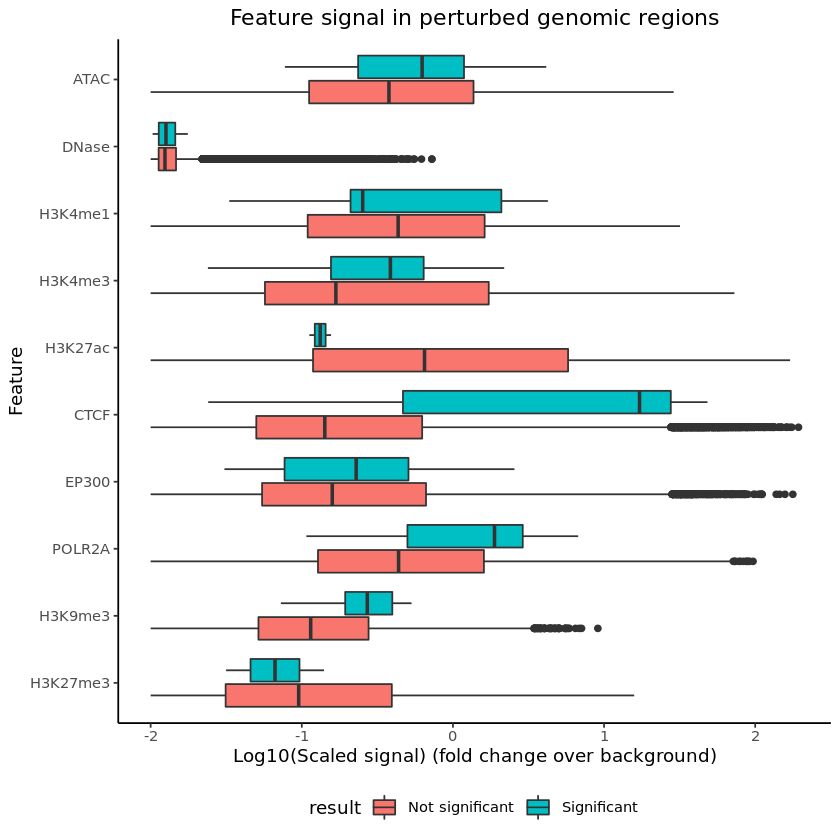

In [30]:
plotdf %>%
group_by(feature) %>%
slice_sample(n=30000) %>%
ungroup() %>%
select(feature, signal_scaled, result) %>%
ggplot(aes(y = feature, x = log10(signal_scaled+0.01), fill = result)) +
geom_boxplot() +
ylab("Feature") +
xlab("Log10(Scaled signal) (fold change over background)") +
ggtitle("Feature signal in perturbed genomic regions") +
theme_classic() +
theme(plot.title = element_text(hjust = 0.5),
      legend.position = "bottom"
     )

For generating the full plot, sometimes R will crash if running from a Jupyter notebook + HPC cluster. Instead, can run the following script via slurm job.

In [ ]:
# pdf(file="k562meta/outs/plot_pdfs/signalcomparison.log10transform.scalebyregionsize.k562.pdf")

# plotdf %>%
# select(feature, signal_scaled, result) %>%
# ggplot(aes(y = feature, x = log10(signal_scaled+0.01), fill = result)) +
# geom_boxplot() +
# ylab("Feature") +
# xlab("Log10(Scaled signal) (fold change over background)") +
# ggtitle("Feature signal in perturbed genomic regions") +
# theme_classic() +
# theme(plot.title = element_text(hjust = 0.5),
#       legend.position = "bottom"
#      )

# dev.off()

In [3]:
%%writefile k562meta/outs/plot_pdfs/signalcomparison.figure.R

### Load packages

suppressPackageStartupMessages(library(tidyverse))

`%notin%` <- Negate(`%in%`)

### Load and process perturbation data

#### Bin coordinates with perturbations

allregions <- read.delim("k562meta/elementReference/combined/binnedgenome.int.k562.elementReference.20230415.merge.bed",
                         header=FALSE, col.names=c("bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>% select(bin) %>% distinct()

head(allregions,n=1)
dim(allregions)

#### Bin coordinates with CREs

sigregions <- read.delim("k562meta/elementQuant/combined/binnedgenome.int.k562.elementQuant.20230415.merge.bed",
                         header=FALSE, col.names=c("bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>% select(bin) %>% distinct()

head(sigregions,n=1)
dim(sigregions)

### Load intersection with `bedgraph` files for features

##### All regions

allregion_h3k27ac <- read.delim("k562meta/outs/comparesignal/binnedgenome.int.k562.elementReference.int.k562.h3k27ac.foldchange.txt",
                             header = FALSE, col.names = c("feature.chr","feature.start","feature.end","signal","bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end),
       feature_coords = paste0(feature.chr,":",feature.start,"-",feature.end),
       feature = "H3K27ac") %>% 
select(feature, bin, feature_coords, signal) %>% distinct()

head(allregion_h3k27ac,n=1)
dim(allregion_h3k27ac)

allregion_dnase <- read.delim("k562meta/outs/comparesignal/binnedgenome.int.k562.elementReference.int.k562.dnase.foldchange.txt",
                             header = FALSE, col.names = c("feature.chr","feature.start","feature.end","signal","bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end),
       feature_coords = paste0(feature.chr,":",feature.start,"-",feature.end),
       feature = "DNase") %>% 
select(feature, bin, feature_coords, signal) %>% distinct()

head(allregion_dnase,n=1)
dim(allregion_dnase)

allregion_atac <- read.delim("k562meta/outs/comparesignal/binnedgenome.int.k562.elementReference.int.k562.atac.foldchange.txt",
                             header = FALSE, col.names = c("feature.chr","feature.start","feature.end","signal","bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end),
       feature_coords = paste0(feature.chr,":",feature.start,"-",feature.end),
       feature = "ATAC") %>% 
select(feature, bin, feature_coords, signal) %>% distinct()

head(allregion_atac,n=1)
dim(allregion_atac)

allregion_h3k4me1 <- read.delim("k562meta/outs/comparesignal/binnedgenome.int.k562.elementReference.int.k562.h3k4me1.foldchange.txt",
                             header = FALSE, col.names = c("feature.chr","feature.start","feature.end","signal","bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end),
       feature_coords = paste0(feature.chr,":",feature.start,"-",feature.end),
       feature = "H3K4me1") %>% 
select(feature, bin, feature_coords, signal) %>% distinct()

head(allregion_atac,n=1)
dim(allregion_atac)

allregion_h3k4me3 <- read.delim("k562meta/outs/comparesignal/binnedgenome.int.k562.elementReference.int.k562.h3k4me3.foldchange.txt",
                             header = FALSE, col.names = c("feature.chr","feature.start","feature.end","signal","bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end),
       feature_coords = paste0(feature.chr,":",feature.start,"-",feature.end),
       feature = "H3K4me3") %>% 
select(feature, bin, feature_coords, signal) %>% distinct()

head(allregion_atac,n=1)
dim(allregion_atac)

allregion_h3k9me3 <- read.delim("k562meta/outs/comparesignal/binnedgenome.int.k562.elementReference.int.k562.h3k9me3.foldchange.txt",
                             header = FALSE, col.names = c("feature.chr","feature.start","feature.end","signal","bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end),
       feature_coords = paste0(feature.chr,":",feature.start,"-",feature.end),
       feature = "H3K9me3") %>% 
select(feature, bin, feature_coords, signal) %>% distinct()

head(allregion_atac,n=1)
dim(allregion_atac)

allregion_h3k27me3 <- read.delim("k562meta/outs/comparesignal/binnedgenome.int.k562.elementReference.int.k562.h3k27me3.foldchange.txt",
                             header = FALSE, col.names = c("feature.chr","feature.start","feature.end","signal","bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end),
       feature_coords = paste0(feature.chr,":",feature.start,"-",feature.end),
       feature = "H3K27me3") %>% 
select(feature, bin, feature_coords, signal) %>% distinct()

head(allregion_atac,n=1)
dim(allregion_atac)

allregion_ep300 <- read.delim("k562meta/outs/comparesignal/binnedgenome.int.k562.elementReference.int.k562.ep300.foldchange.txt",
                             header = FALSE, col.names = c("feature.chr","feature.start","feature.end","signal","bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end),
       feature_coords = paste0(feature.chr,":",feature.start,"-",feature.end),
       feature = "EP300") %>% 
select(feature, bin, feature_coords, signal) %>% distinct()

head(allregion_atac,n=1)
dim(allregion_atac)

allregion_ctcf <- read.delim("k562meta/outs/comparesignal/binnedgenome.int.k562.elementReference.int.k562.ctcf.foldchange.txt",
                             header = FALSE, col.names = c("feature.chr","feature.start","feature.end","signal","bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end),
       feature_coords = paste0(feature.chr,":",feature.start,"-",feature.end),
       feature = "CTCF") %>% 
select(feature, bin, feature_coords, signal) %>% distinct()

head(allregion_atac,n=1)
dim(allregion_atac)

allregion_polr2a <- read.delim("k562meta/outs/comparesignal/binnedgenome.int.k562.elementReference.int.k562.polr2a.foldchange.txt",
                             header = FALSE, col.names = c("feature.chr","feature.start","feature.end","signal","bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end),
       feature_coords = paste0(feature.chr,":",feature.start,"-",feature.end),
       feature = "POLR2A") %>% 
select(feature, bin, feature_coords, signal) %>% distinct()

head(allregion_atac,n=1)
dim(allregion_atac)

##### Significant regions

sigregion_h3k27ac <- read.delim("k562meta/outs/comparesignal/binnedgenome.int.k562.elementQuant.int.k562.h3k27ac.foldchange.txt",
                             header = FALSE, col.names = c("feature.chr","feature.start","feature.end","signal","bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>%
select(bin) %>% distinct() %>% pull()

length(sigregion_h3k27ac)

sigregion_dnase <- read.delim("k562meta/outs/comparesignal/binnedgenome.int.k562.elementQuant.int.k562.dnase.foldchange.txt",
                             header = FALSE, col.names = c("feature.chr","feature.start","feature.end","signal","bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>%
select(bin) %>% distinct() %>% pull()

length(sigregion_dnase)

sigregion_atac <- read.delim("k562meta/outs/comparesignal/binnedgenome.int.k562.elementQuant.int.k562.atac.foldchange.txt",
                             header = FALSE, col.names = c("feature.chr","feature.start","feature.end","signal","bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>%
select(bin) %>% distinct() %>% pull()

length(sigregion_atac)

sigregion_h3k4me1 <- read.delim("k562meta/outs/comparesignal/binnedgenome.int.k562.elementQuant.int.k562.h3k4me1.foldchange.txt",
                             header = FALSE, col.names = c("feature.chr","feature.start","feature.end","signal","bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>%
select(bin) %>% distinct() %>% pull()

length(sigregion_atac)

sigregion_h3k4me3 <- read.delim("k562meta/outs/comparesignal/binnedgenome.int.k562.elementQuant.int.k562.h3k4me3.foldchange.txt",
                             header = FALSE, col.names = c("feature.chr","feature.start","feature.end","signal","bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>%
select(bin) %>% distinct() %>% pull()

length(sigregion_atac)

sigregion_h3k9me3 <- read.delim("k562meta/outs/comparesignal/binnedgenome.int.k562.elementQuant.int.k562.h3k9me3.foldchange.txt",
                             header = FALSE, col.names = c("feature.chr","feature.start","feature.end","signal","bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>%
select(bin) %>% distinct() %>% pull()

length(sigregion_atac)

sigregion_h3k27me3 <- read.delim("k562meta/outs/comparesignal/binnedgenome.int.k562.elementQuant.int.k562.h3k27me3.foldchange.txt",
                             header = FALSE, col.names = c("feature.chr","feature.start","feature.end","signal","bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>%
select(bin) %>% distinct() %>% pull()

length(sigregion_atac)

sigregion_ep300 <- read.delim("k562meta/outs/comparesignal/binnedgenome.int.k562.elementQuant.int.k562.ep300.foldchange.txt",
                             header = FALSE, col.names = c("feature.chr","feature.start","feature.end","signal","bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>%
select(bin) %>% distinct() %>% pull()

length(sigregion_atac)

sigregion_ctcf <- read.delim("k562meta/outs/comparesignal/binnedgenome.int.k562.elementQuant.int.k562.ctcf.foldchange.txt",
                             header = FALSE, col.names = c("feature.chr","feature.start","feature.end","signal","bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>%
select(bin) %>% distinct() %>% pull()

length(sigregion_atac)

sigregion_polr2a <- read.delim("k562meta/outs/comparesignal/binnedgenome.int.k562.elementQuant.int.k562.polr2a.foldchange.txt",
                             header = FALSE, col.names = c("feature.chr","feature.start","feature.end","signal","bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>%
select(bin) %>% distinct() %>% pull()

length(sigregion_atac)

plotdf <-
rbind(
    allregion_h3k4me1 %>%
    mutate(result = ifelse(bin %in% sigregion_h3k4me1, "Significant","Not significant")) %>%
    separate(feature_coords, into = c("chr","start","end")),
    allregion_h3k4me3 %>%
    mutate(result = ifelse(bin %in% sigregion_h3k4me1, "Significant","Not significant")) %>%
    separate(feature_coords, into = c("chr","start","end")),
    allregion_h3k9me3 %>%
    mutate(result = ifelse(bin %in% sigregion_h3k9me3, "Significant","Not significant")) %>%
    separate(feature_coords, into = c("chr","start","end")),
    allregion_h3k27ac %>%
    mutate(result = ifelse(bin %in% sigregion_h3k27ac, "Significant","Not significant")) %>%
    separate(feature_coords, into = c("chr","start","end")),
    allregion_h3k27me3 %>%
    mutate(result = ifelse(bin %in% sigregion_h3k27me3, "Significant","Not significant")) %>%
    separate(feature_coords, into = c("chr","start","end"))
    ) %>%
mutate(region_size = as.numeric(end) - as.numeric(start),
       signal_scaled = signal/region_size) %>%
bind_rows(
    rbind(
        allregion_ep300 %>%
        mutate(result = ifelse(bin %in% sigregion_ep300, "Significant","Not significant")) %>%
        separate(feature_coords, into = c("chr","start","end")),
        allregion_ctcf %>%
        mutate(result = ifelse(bin %in% sigregion_ctcf, "Significant","Not significant")) %>%
        separate(feature_coords, into = c("chr","start","end")),
        allregion_polr2a %>%
        mutate(result = ifelse(bin %in% sigregion_polr2a, "Significant","Not significant")) %>%
        separate(feature_coords, into = c("chr","start","end")),
        allregion_atac %>%
        mutate(result = ifelse(bin %in% sigregion_atac, "Significant","Not significant")) %>%
        separate(feature_coords, into = c("chr","start","end")),
        allregion_dnase %>%
        mutate(result = ifelse(bin %in% sigregion_dnase, "Significant","Not significant")) %>%
        separate(feature_coords, into = c("chr","start","end"))
    ) %>%mutate(region_size = as.numeric(end) - as.numeric(start), signal_scaled = signal/region_size)
    )

plotdf$feature = factor(plotdf$feature, levels = c("H3K27me3",
                                                   "H3K9me3",
                                                   "POLR2A",
                                                   "EP300",
                                                   "CTCF",
                                                   "H3K27ac",
                                                   "H3K4me3",
                                                   "H3K4me1",
                                                   "DNase",
                                                   "ATAC"))

rm(list=ls(pattern="allregion_"))
rm(list=ls(pattern="sigregion_"))

str(as.list(.GlobalEnv))

head(plotdf,n=1)

group.colors <- c(`Not significant` = "grey", Significant = "green")

pdf(file="k562meta/outs/plot_pdfs/signalcomparison.log10transform.scalebyregionsize.k562.pdf")

plotdf %>%
select(feature, signal_scaled, result) %>%
ggplot(aes(y = feature, x = log10(signal_scaled+0.01), fill = result)) +
geom_boxplot() +
ylab("Feature") +
xlab("Log10(Scaled signal) (fold change over background)") +
ggtitle("Feature signal in perturbed genomic regions") +
scale_fill_manual(values = group.colors) +
theme_classic() +
theme(plot.title = element_text(hjust = 0.5),
      legend.position = "bottom"
     )

dev.off()

Overwriting /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/k562meta/outs/plot_pdfs/signalcomparison.figure.R


****Updated the following code with the path to your conda environment****

/path_to/condaR/bin/Rscript k562meta/outs/plot_pdfs/signalcomparison.figure.R

In [4]:
%%bash

source activate /path_to/conda

sbatch \
    --job-name=signal \
    --mail-user=lrb53@duke.edu \
    --mail-type=END \
    --partition all \
    --mem=64G \
    --cpus-per-task=1 \
    -o k562meta/outs/plot_pdfs/signalcomparison.figure.log.txt \
    <<'EOF'
#!/bin/bash

/path_to/condaR/bin/Rscript k562meta/outs/plot_pdfs/signalcomparison.figure.R 

EOF

Submitted batch job 30029176
